# Inaugural Project

In this Inaugural Project we will be considering a household with both female and male members who jointly maximize their utility by choosing how they spend their time. They split their 24 hours between hours working in the market, where they receive wages for their contribution to the labour market, and hours working at home. We will use given information to answer the questions related to the variables that distinguish between hours worked at the market or at home, plot the ratio-variables against each other ect. 

First we imported libraries and packages we are going to use to solve the maximazation problem for the considered household:

In [38]:
# import libraries and packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
from scipy import optimize
from scipy.optimize import minimize
import pandas as pd
import warnings

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

The code we structured sets up and solves a household specialization model for different values of alpha and sigma and creates a 3D plot of the results. We start by  defining the parameters, then we  structured a for loop over different combinations of the different alpha and sigma values. Next we structured the code to solve the model for each combination and store the results in arrays. Then we computed the ratio of HF_lis/HM_lis and fiinally, created a 3D plot of the ratio as a function of alpha and sigma. The 3D plot can be seen at the end of the code. 

/Users/viktoria/projects-2023-icehot1/inauguralproject/inauguralproject.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha * HF**((par.sigma-1)/par.sigma))**((par.sigma-1)/par.sigma)
/var/folders/wq/txc67hk176s9t6qxs4rj0b5m0000gn/T/ipykernel_70694/297930066.py:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m, shrink=0.6)


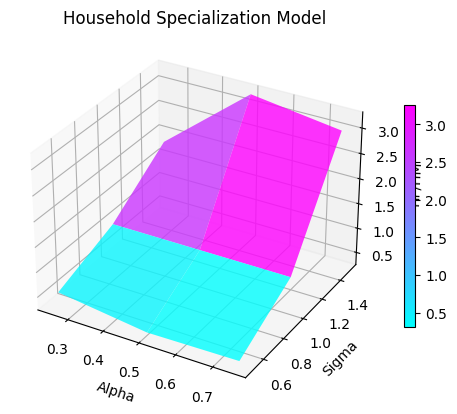

In [54]:
# Define the parameters
model = HouseholdSpecializationModelClass()

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

HF_lis = np.zeros((3, 3))
HM_lis = np.zeros((3, 3))

# loop over the alpha and sigma values using the enumerate function
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        model.par.alpha = alpha
        model.par.sigma = sigma

        # solve the model
        run = model.solve_discrete()

        # store the results in arrays
        HF_lis[i, j] = run.HF
        HM_lis[i, j] = run.HM

        

# Compute the ratio HF_lis/HM_lis
ratio_lis = HF_lis/HM_lis

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
alpha_values = np.transpose(alpha_values)

# Plot the surface
X, Y = np.meshgrid(alpha_values.T, sigma_values)
ax.plot_surface(X, Y, ratio_lis, cmap='cool', alpha=0.8)

# Set the labels and title
ax.set_xlabel('Alpha')
ax.set_ylabel('Sigma')
ax.set_zlabel('HF/HM')
ax.set_title('Household Specialization Model')

# Add a colorbar
m = plt.cm.ScalarMappable(cmap='cool')
m.set_array(ratio_lis)
plt.colorbar(m, shrink=0.6)

# Show the plot
plt.show()


In [53]:
# print the ratio between hours worked at home between females and males. 

print(ratio_lis)


[[0.54545455 0.30769231 0.33333333]
 [1.         1.         1.        ]
 [1.83333333 3.25       3.        ]]


These result provide insights into how households make decisions about allocating their time and resources between market work and home production, and how these decisions are influenced by factors such as the degree of elisticity between market work and home production. 
The ratio between hours worked at home between male and female can be seen right above. If the ratio is greater than one it means that the household tends to specialize in home production rather then market work. As alpha increases (i.e. households devote more resources to home production), the ratio of HF_lis/HM_lis increases, indicating a greater degree of specialization in home production. This result is intuitive since households that allocate more resources to home production will likely specialize more in home production than in market work.

Similarly, as sigma increases (i.e. market work becomes more substitutable with home production), the ratio of HF_lis/HM_lis decreases, indicating a greater degree of household specialization in market work. This result is also intuitive since households that face more substitutability between market work and home production will tend to allocate their time and resources more evenly between the two activities.

# Question 2

This code generates a plot of the logarithm of the ratio of household production (HF) to market production (HM) against the logarithm of the ratio of the wage rate for household production (wF) to the wage rate for market production (wM). We start by establishing the model right and make sure that the values for female wages are stated correctly for the discrete version of the model. Next we store the ratio of Hf/Hm and wF/wM in new name variables (x,y) and finally plot the discrete version of the model as can be seen at the end of the question. 
The plot allows us to visually examine the relationship between the wage rate ratio and the household production/market production ratio and can provide isnights into how households make decisions about allocating their time and resources between market work and home production, and how changes in relative wage rates affect these decisions.

In [25]:
#Define the values for female wages and establish the model right. 
model = HouseholdSpecializationModelClass()
model.solve_wF_vec(discrete=True)

#Taking log of both HF/HM and WF/WM and store them in new name variables
y = np.log(model.sol.HF_vec/model.sol.HM_vec)
x = np.log(model.par.wF_vec/model.par.wM)


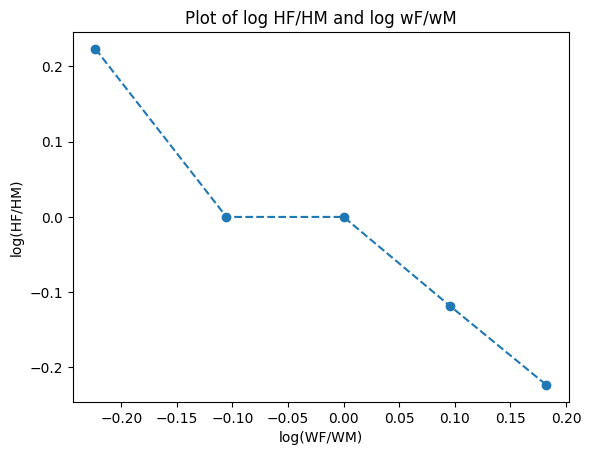

In [26]:
#plot tha graph 
plt.plot(x, y, 'o--')

# Set the labels and title
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')
plt.title('Plot of log HF/HM and log wF/wM')

# Show the plot
plt.show()

By looking at the plot we can see that changes in relative wage rates can have significant effects on the degree of household specialization in home production, and that households make decisions about allocating their time and resources based on these wage differentials. By looking at the plot, it suggests that an increase in the wage rate for market work relative to the wage rate for household production leads to an increase in the ratio of market work to household production. This can be interpreted as indicating that households are more likely to specialize in market work when the wage rate for this type of work is relatively higher than the wage rate for home production.

# Question 3

We start by modifying the code from question 2 so we can set the choice set to **continious**. Here we set the wage vector for female workers to be solved for at a continuous range of wage levels, rather than at a set of discrete values like in question 2. We can then compare the discrete version against the continious version. 

/Users/viktoria/Library/Python/3.8/lib/python/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


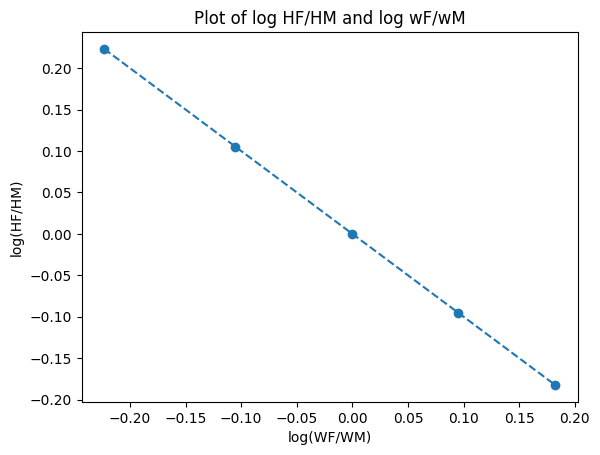

In [27]:
#setting the vector for female wages on continiously instead of discrete 
model = HouseholdSpecializationModelClass()
model.solve_wF_vec(discrete=False)

#Storing the log of the ratios in a new name variables (x,y)
y = np.log(model.sol.HF_vec/model.sol.HM_vec)
x = np.log(model.par.wF_vec/model.par.wM) 
plt.plot(x, y, 'o--')
# Set the labels and title
plt.xlabel('log(WF/WM)')
plt.ylabel('log(HF/HM)')
plt.title('Plot of log HF/HM and log wF/wM')

# Show the plot
plt.show()



The slope of the continious model is smoother in a straight line that goes from the top left corner to the down right corner(i.e. negative). it suggests that an increase in wage rate for male market work leads to an increase in the ratio of market production to household production. This implies that households choose to rather focus on market work when the wage rate for male market work is relatively higher than the wage rate for female household work. 
Ættum kannski að bæta við economic interpretation eh með að utaf þetta er continuous og að þá meiki sense að þetta sé bein lína. 

# Question 4

Our target betas are $\beta_0 = 0.4$ and $\beta_1=-0.1$. We want to choose $\alpha$ and $\sigma$ such that the error is minimezed: $$ error = (\beta_0 - \hat{\beta_0})^2 + (\beta_0 - \hat{\beta_0})^2$$
Now lets estimate our model: 

In [28]:
model = HouseholdSpecializationModelClass()
result = model.estimate()
alpha_optimized, sigma_optimized = result.x

print(f" Alpha: {alpha_optimized:.3f}")
print(f" Sigma: {sigma_optimized:.3f}")
print(f"Coefficient Beta_0: {model.sol.beta0:.3f}")
print(f"Coefficient Beta_1: {model.sol.beta1:.3f}")

/Users/viktoria/projects-2023-icehot1/inauguralproject/inauguralproject.py:64: RuntimeWarning: divide by zero encountered in scalar power
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha * HF**((par.sigma-1)/par.sigma))**((par.sigma-1)/par.sigma)
/Users/viktoria/projects-2023-icehot1/inauguralproject/inauguralproject.py:64: RuntimeWarning: invalid value encountered in scalar multiply
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha * HF**((par.sigma-1)/par.sigma))**((par.sigma-1)/par.sigma)


 Alpha: 0.980
 Sigma: 0.106
Coefficient Beta_0: 0.381
Coefficient Beta_1: -0.102


$\beta_0$ and $\beta_1$ are quite close to their target values. $\sigma$ is close to 0 which we can interpret as the elasticity of substitution between male and female home production, signifies that the male and female home production are almost perfect complements (i.e., you can't easily substitute one for the other). 
Alpha specifies the contribution of male and female home production to the total home production, particularly it represents the share of female home production. As $\alpha$ is close to 1, which makes female home production more important.  
These findings are quite interesting and tell us that the importance of males and females in home production is quite sticky and hard to change as they are not perfect complements. 


# Question 5

In [29]:
#Code

ADD CONCISE CONLUSION.